In [36]:
library(ggplot2)
library(reshape2)

In [37]:
#' @name assign_vector
#' @param data A vector of data to perform the t-test on.
#' @param n An integer indicating the number of t-tests to perform. Default is 1000
#' @return A data frame in "tall" format
assign_vector <- function(data, n = 1000) {
  # replicate the call to shapiro.test n times to build up a vector of p-values
  p.5 <- replicate(n=n, expr=shapiro.test(sample(my.data, 5, replace=TRUE))$p.value)
  p.10 <- replicate(n=n, expr=shapiro.test(sample(my.data, 10, replace=TRUE))$p.value)
  p.1000 <- replicate(n=n, expr=shapiro.test(sample(my.data, 1000, replace=TRUE))$p.value)
  #' Combine the data into a data frame, 
  #' one column for each number of samples tested.
  p.df <- cbind(p.5, p.10, p.1000)
  p.df <- as.data.frame(p.df)
  colnames(p.df) <- c("5 samples","10 samples","1000 samples")
  #' Put the data in "tall" format, one column for number of samples
  #' and one column for the p-value.
  p.df.m <- melt(p.df)
  #' Make sure the levels are sorted correctly.
  p.df.m <- transform(p.df.m, variable = factor(variable, levels = c("5 samples","10 samples","1000 samples")))
  return(p.df.m)  
}

In [38]:
n.rand <- 100000
n.test <- 10000
my.data <- rnorm(n.rand)
p.df.m <- assign_vector(my.data, n = n.test)

No id variables; using all as measure variables


No id variables; using all as measure variables


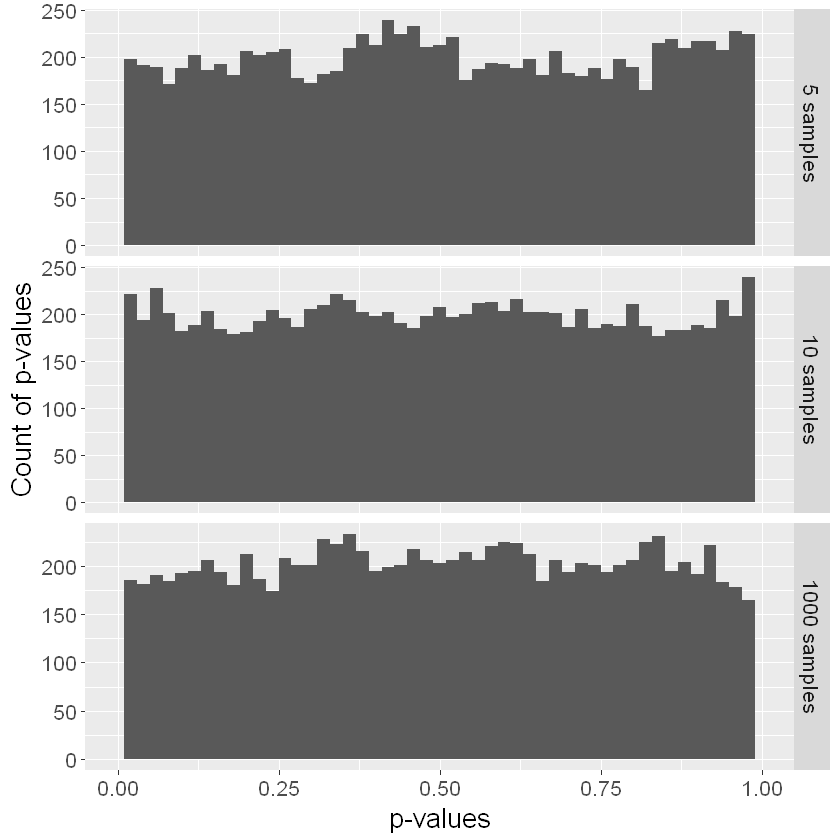

In [39]:
p.df.m <- assign_vector(my.data, n = n.test)
ggplot(p.df.m, aes(x = value)) + 
  geom_histogram(binwidth = 1/50) + 
  facet_grid(facets=variable ~ ., scales="free_y") + 
  xlim(0,1) +
  ylab("Count of p-values") +
  xlab("p-values") +
  theme(text = element_text(size = 16))

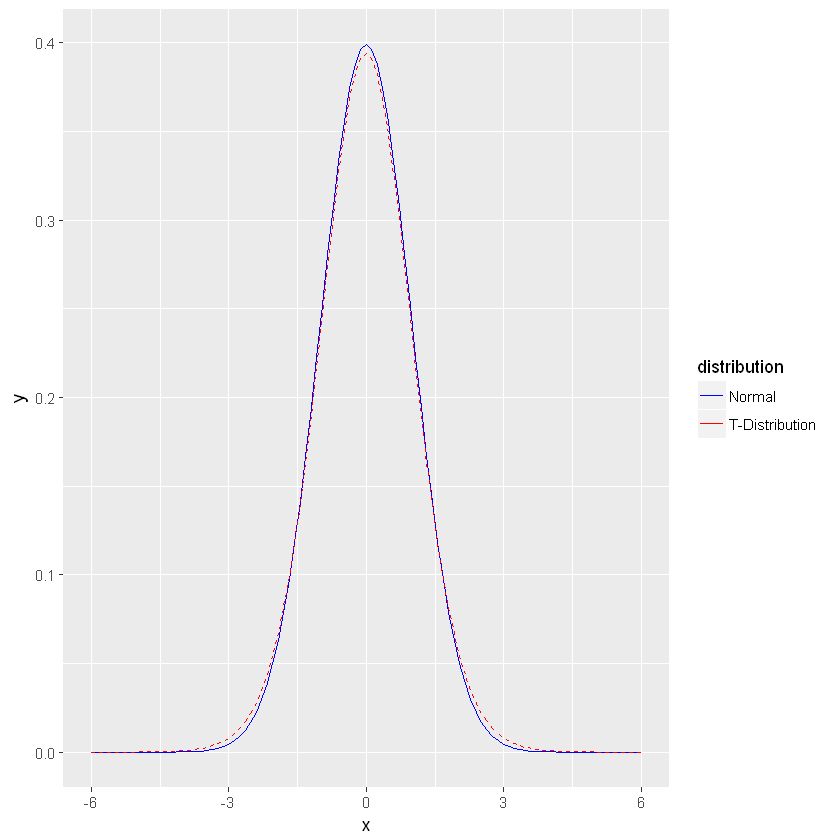

In [40]:
ggplot(NULL, aes(x=x, colour = distribution)) + 
  stat_function(fun=dnorm, data = data.frame(x = c(-6,6), distribution = factor(1))) + 
  stat_function(fun=dt, args = list( df = 20), data = data.frame(x = c(-6,6), distribution = factor(2)), linetype = "dashed") + 
  scale_colour_manual(values = c("blue","red"), labels = c("Normal","T-Distribution"))


No id variables; using all as measure variables


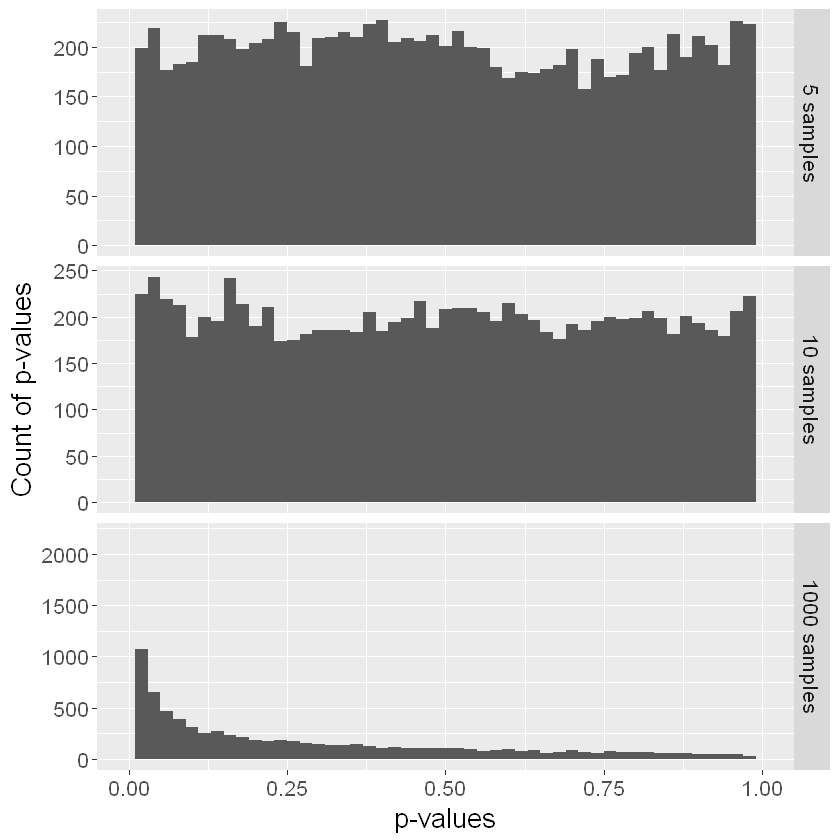

In [41]:
my.data <- rt(n.rand, df = 20)
p.df.m <- assign_vector(my.data, n = n.test)
ggplot(p.df.m, aes(x = value)) + 
  geom_histogram(binwidth = 1/50) + 
  facet_grid(facets=variable ~ ., scales="free_y") + 
  xlim(0,1) +
  ylab("Count of p-values") +
  xlab("p-values") +
  theme(text = element_text(size = 16))

In [42]:
my.data.2 <- rnorm(n.rand)

In [43]:
# Trim off the tails
my.data <- my.data[which(my.data < 3 & my.data > -3)]
# Add in tails from the other distribution
my.data <- c(my.data, my.data.2[which(my.data.2 < -3 | my.data.2 > 3)])

No id variables; using all as measure variables


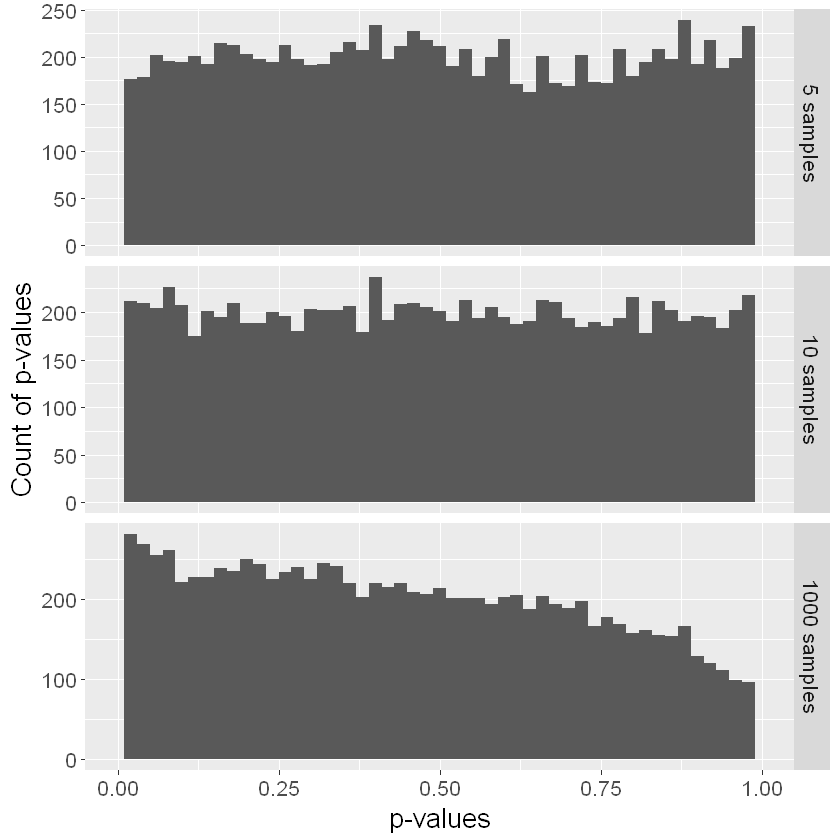

In [44]:
p.df.m <- assign_vector(my.data, n = n.test)
ggplot(p.df.m, aes(x = value)) + 
  geom_histogram(binwidth = 1/50) + 
  facet_grid(facets=variable ~ ., scales="free_y") + 
  xlim(0,1) +
  ylab("Count of p-values") +
  xlab("p-values") +
  theme(text = element_text(size = 16))

In [45]:
my.data <- rnorm(n.rand)
my.data.2 <- rt(n.rand, df = 20)
# Trim off the tails
my.data <- my.data[which(my.data < 3 & my.data > -3)]
# Add in tails from the other distribution
my.data <- c(my.data, my.data.2[which(my.data.2 < -3 | my.data.2 > 3)])

No id variables; using all as measure variables


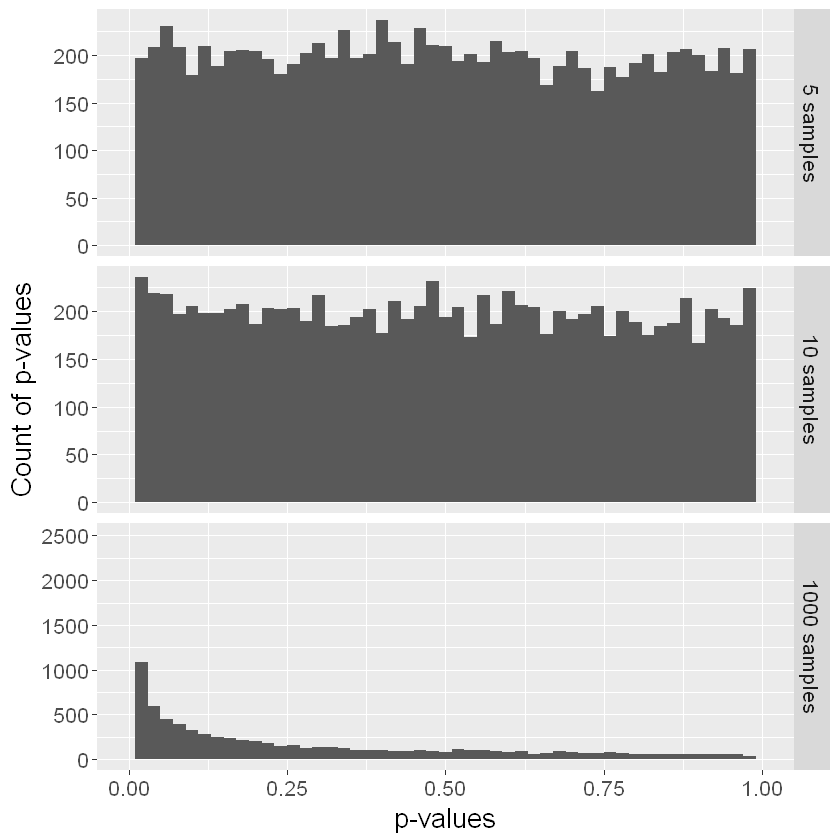

In [46]:
p.df.m <- assign_vector(my.data, n = n.test)
ggplot(p.df.m, aes(x = value)) + 
  geom_histogram(binwidth = 1/50) + 
  facet_grid(facets=variable ~ ., scales="free_y") + 
  xlim(0,1) +
  ylab("Count of p-values") +
  xlab("p-values") +
  theme(text = element_text(size = 16))

In [47]:
my.data <- rlnorm(n.rand, 0, 0.4)


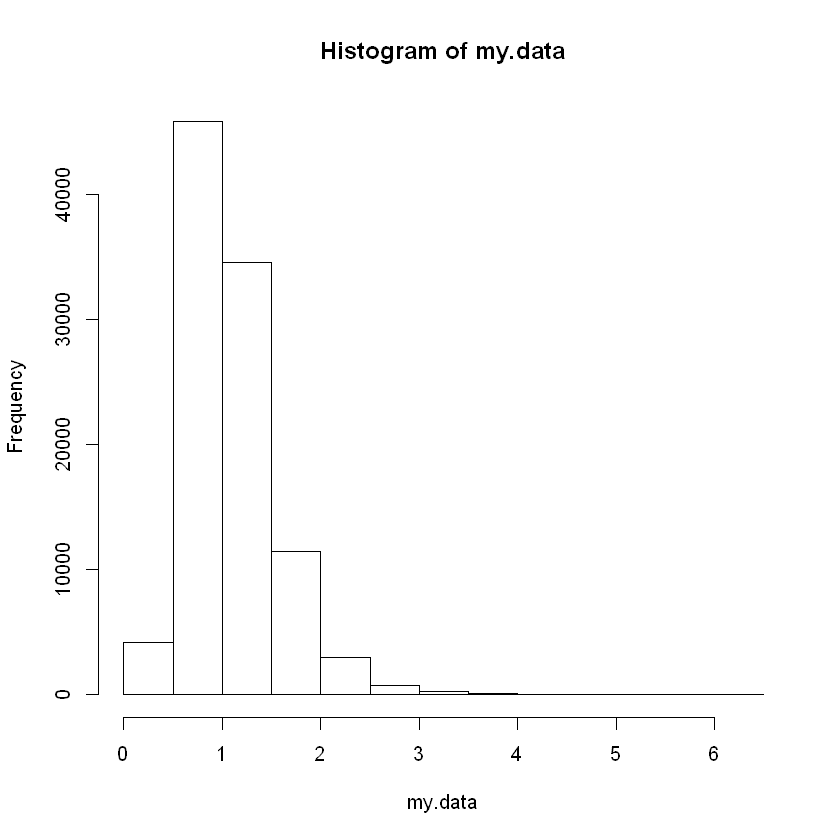

In [48]:
hist(my.data)

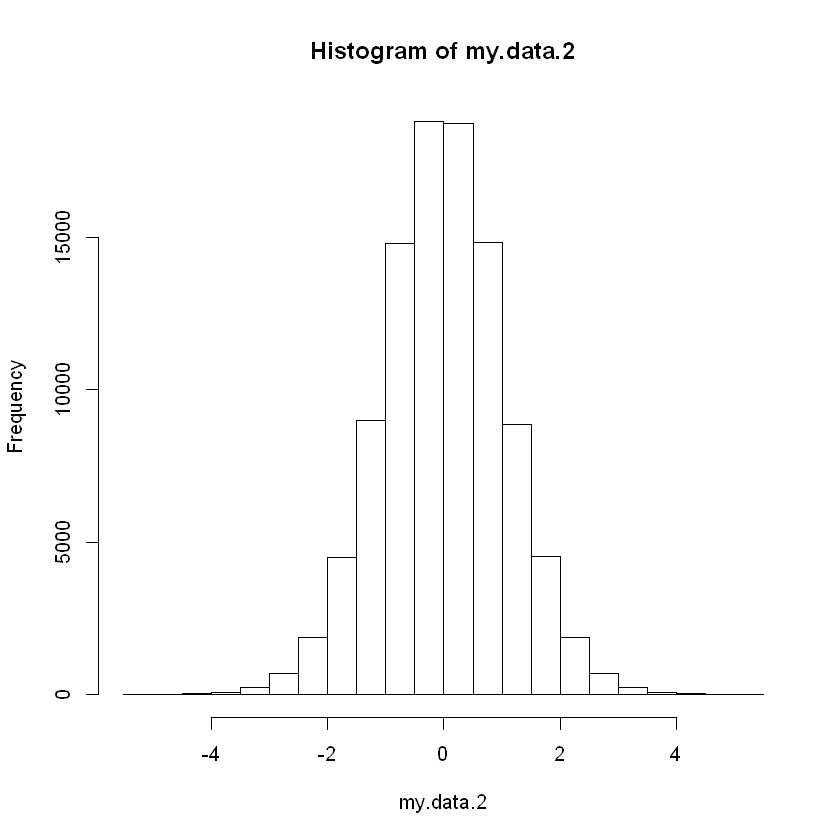

In [49]:
hist(my.data.2)

No id variables; using all as measure variables


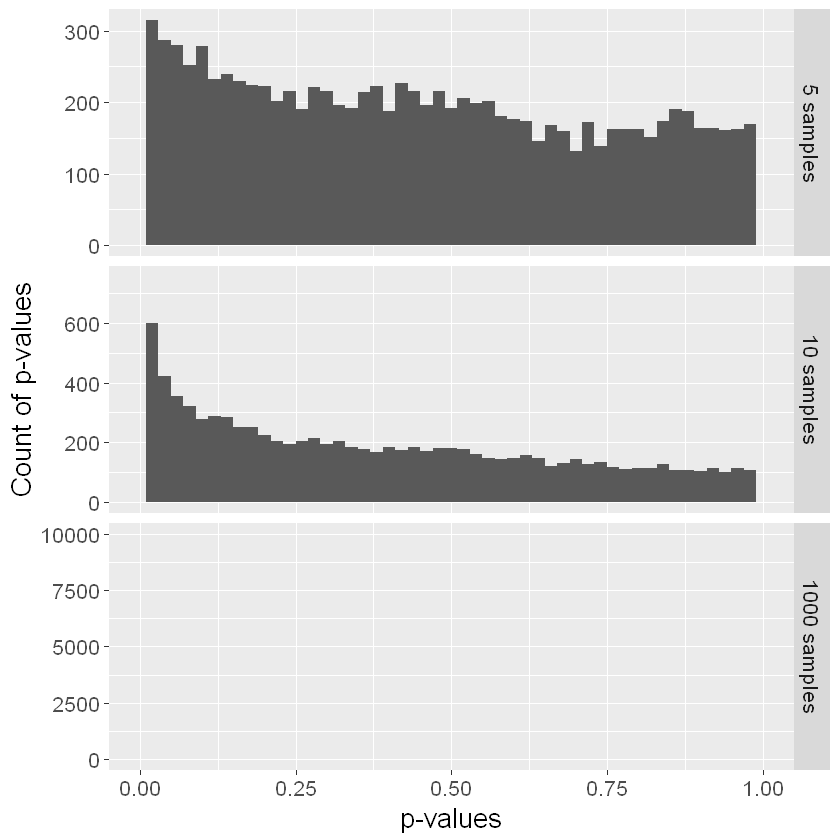

In [50]:
p.df.m <- assign_vector(my.data, n = n.test)
ggplot(p.df.m, aes(x = value)) + 
  geom_histogram(binwidth = 1/50) + 
  facet_grid(facets=variable ~ ., scales="free_y") + 
  xlim(0,1) +
  ylab("Count of p-values") +
  xlab("p-values") +
  theme(text = element_text(size = 16))